<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Garage 1
## Standard ICP

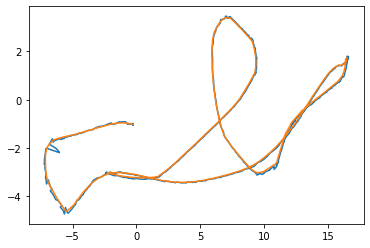

0.06636117609462638

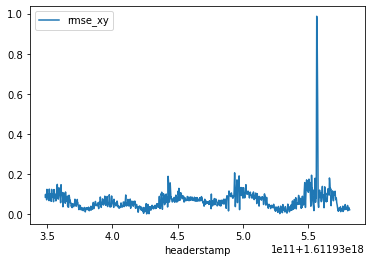

In [3]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage1_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage1_leica_4.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(-5.0, -2.0)

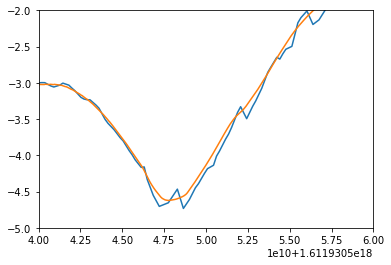

In [9]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4.5e8, leica['trans_x'])
plt.xlim(1.61193e18 + 5.4e11, 1.61193e18 + 5.6e11)
plt.ylim(-5, -2)

## NYU Segmentation

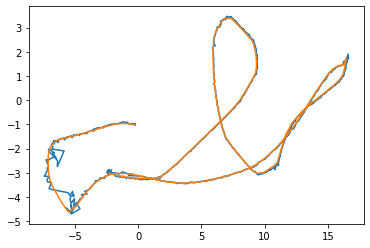

Mean: 0.077, Median: 0.055


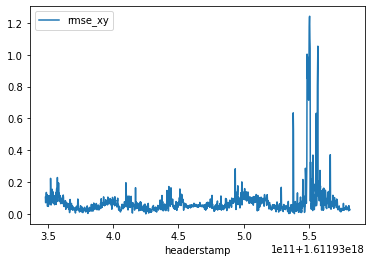

In [14]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Our Segmentation

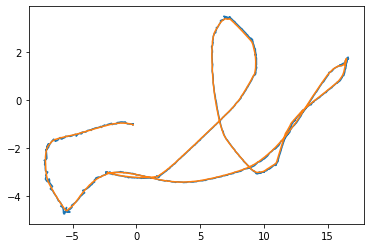

Mean: 0.059, Median: 0.054


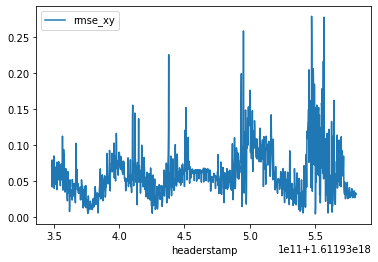

In [4]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Garage2
## Standard ICP

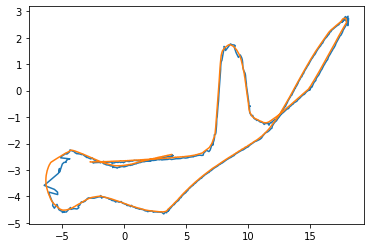

0.08690452011450207

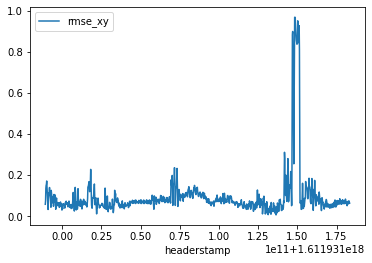

In [10]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage2_leica_1.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Segmentation

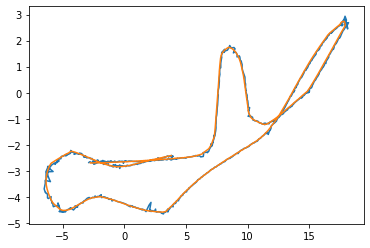

Mean: 0.077, Median: 0.064


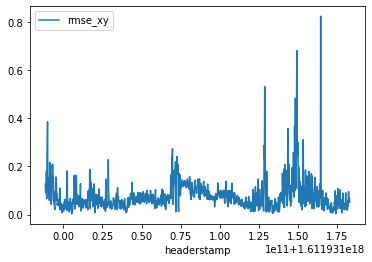

In [15]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Our Segmentation

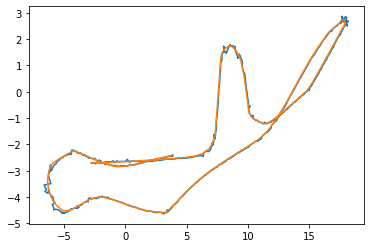

Mean: 0.064, Median: 0.057


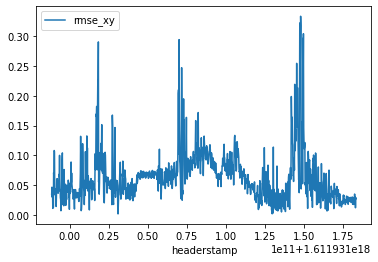

In [5]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Garage3
## Standard ICP

In [64]:
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_leica_27.csv')

In [65]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_icp_55.csv')

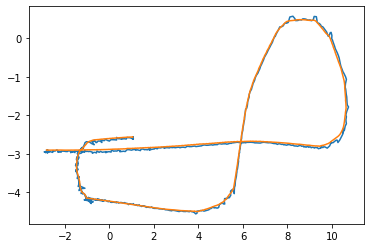

In [66]:
plt.figure()
plt.plot(icp1['trans_x'], icp1['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])

In [68]:
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'], -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'], leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp['rmse_xy'].mean()

0.13252305474831794

(3.0, 6.0)

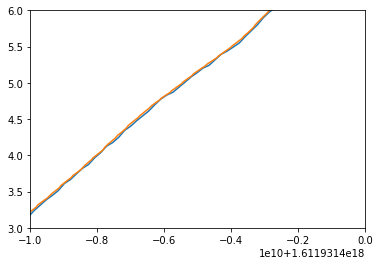

In [29]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

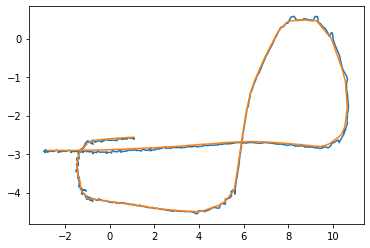

Mean: 0.050, Median: 0.041, Std: 0.037


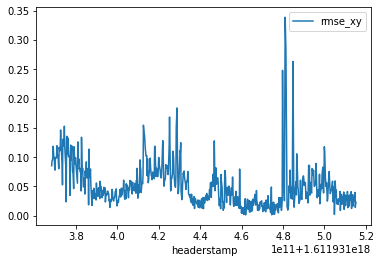

In [30]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## With Segmentation

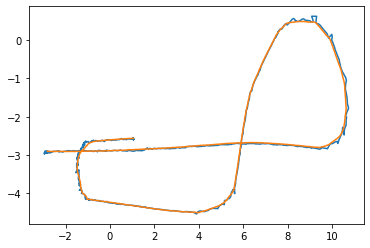

Mean: 0.043, Median: 0.035, Std: 0.031


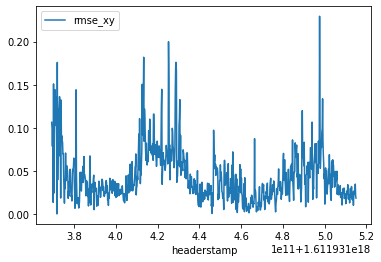

In [21]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_icp_14.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_leica_14.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))


(3, 6)

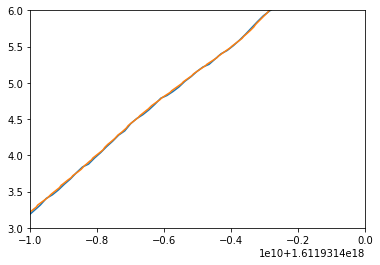

In [62]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

## Segmentation from NYU

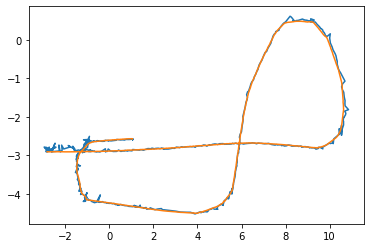

0.05542131578044619

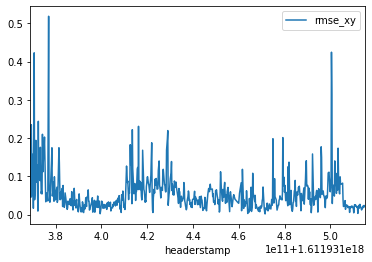

In [73]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_leica_6.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(3, 6)

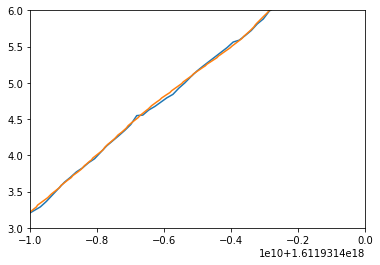

In [79]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

Francescos Model

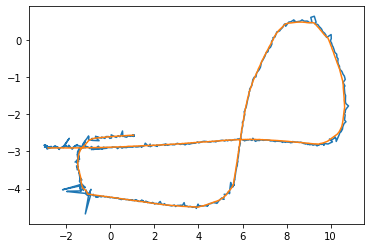

Mean: 0.058, Median: 0.041, Std: 0.073


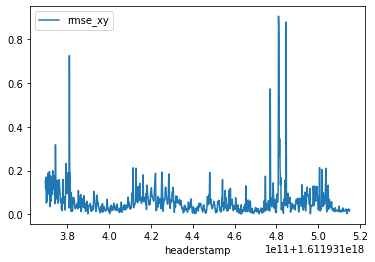

In [22]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# Rumlang 1
## Standard ICP

a failed example:

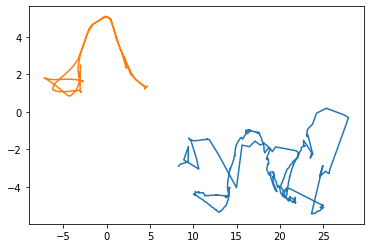

ValueError: A value in x_new is above the interpolation range.

In [80]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_43.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_43.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(1.61278395e+18, 1.61278405e+18)

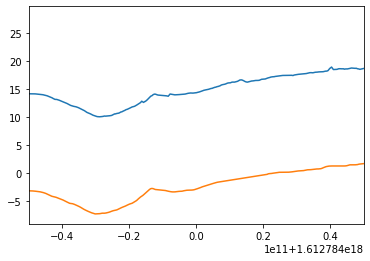

In [84]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+40.5e11)

a better working example (rotated in the correct direction in the end)

In [31]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_44.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_44.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

FileNotFoundError: [Errno 2] No such file or directory: '/home/blumh/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_44.csv'

(12, 14)

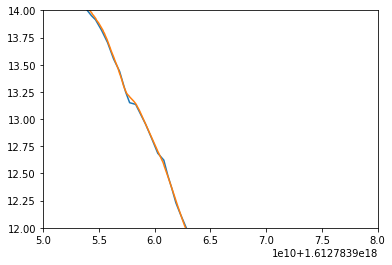

In [111]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.15e9, leica['aligned_x'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+39.8e11)
plt.ylim(12, 14)

## Segmentation from NYU

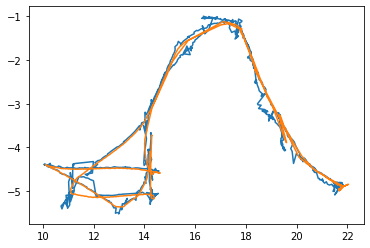

0.1324068418258569

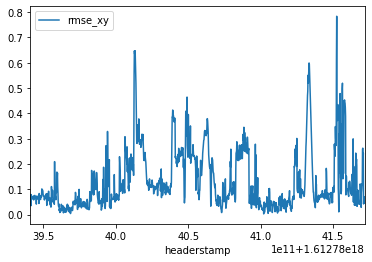

In [118]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

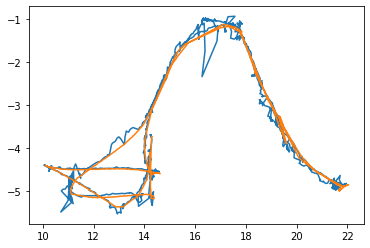

Mean: 0.126, Median: 0.078, Std: 0.129


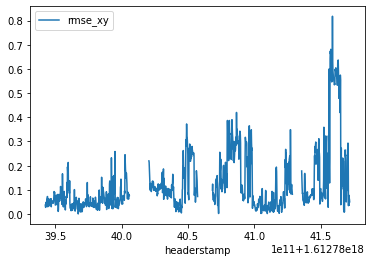

In [33]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# Our Segmentation

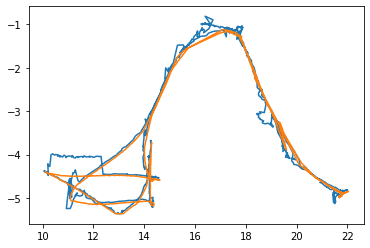

Mean: 0.104, Median: 0.068, Std: 0.105


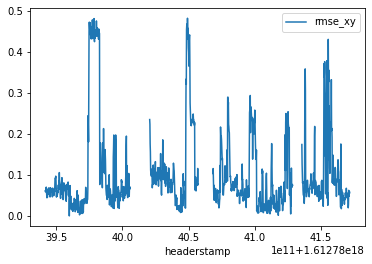

In [32]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# Rumlang 2
## Standard ICP

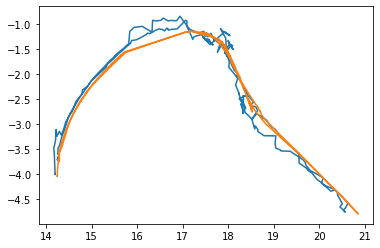

0.14412372344208826

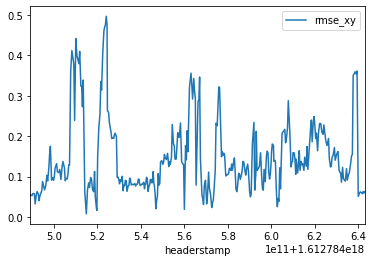

In [100]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

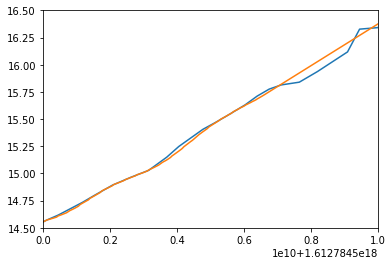

In [99]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

## Segmentation from NYU

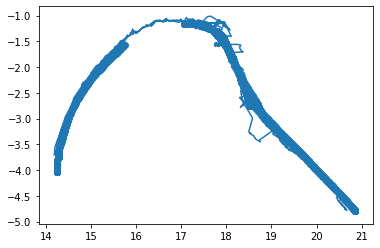

0.1284604427327006

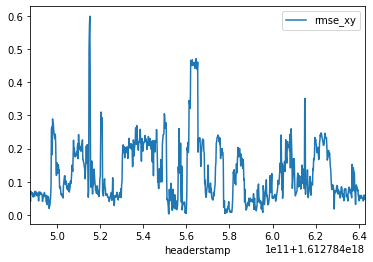

In [120]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

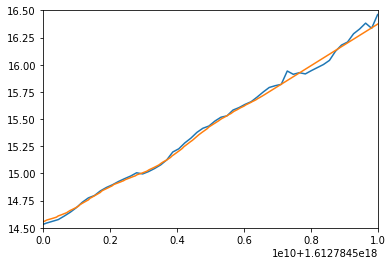

In [121]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

with Francescos pretraine model:

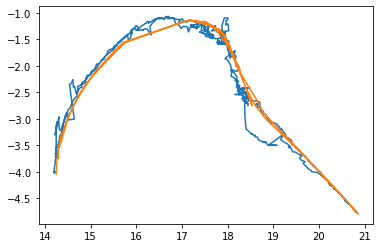

Mean: 0.131, Median: 0.113, Std: 0.079


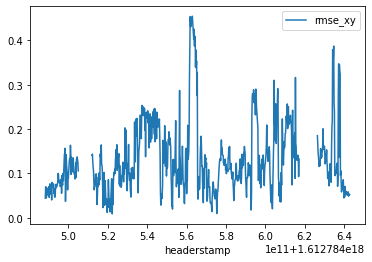

In [3]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

In [28]:
deltas = leica['headerstamp'].diff()
deltas[deltas > 1e9].index[0]

329

In [24]:
icp[np.logical_and(icp['headerstamp'] > leica['headerstamp'][328], icp['headerstamp'] < leica['headerstamp'][329])]

headerstamp  receivestamp    trans_x   trans_y   trans_z  \
94   1612784505137317000  1.612785e+09  15.477712 -1.675954  1.020049   
95   1612784505317384000  1.612785e+09  15.502507 -1.645557  1.024798   
96   1612784505497380000  1.612785e+09  15.524487 -1.614152  1.022233   
97   1612784505677345000  1.612785e+09  15.574402 -1.609082  1.077487   
98   1612784505857359000  1.612785e+09  15.591439 -1.566540  1.055905   
99   1612784506037323000  1.612785e+09  15.632093 -1.536273  1.006461   
100  1612784506217370000  1.612785e+09  15.670708 -1.507861  1.021117   
101  1612784506397388000  1.612785e+09  15.709212 -1.476708  1.020651   
102  1612784506577325000  1.612785e+09  15.773674 -1.434523  0.995965   
103  1612784506757314000  1.612785e+09  15.782602 -1.415807  1.023775   
104  1612784506937343000  1.612785e+09  15.802464 -1.409480  1.056083   
105  1612784507117335000  1.612785e+09  15.823951 -1.514925  0.849560   
106  1612784507297376000  1.612785e+09  15.871978 -1.476674  0.800139   
107  1612784507477298000  1.612785e+09  15.886970 -1.333422  0.729249   
108  1612784507657299000  1.612785e+09  15.906381 -1.397036  0.663316   
109  1612784507837342000  1.612785e+09  15.890223 -1.344482  0.807110   
110  1612784508017341000  1.612785e+09  15.997133 -1.240585  1.016036   
111  1612784508197328000  1.612785e+09  16.033464 -1.263794  1.059634   
112  1612784508377294000  1.612785e+09  16.017632 -1.326787  0.946309   
113  1612784508557293000  1.612785e+09  16.053440 -1.331146  0.820509   
114  1612784508737309000  1.612785e+09  16.108870 -1.316528  0.757993   
115  1612784508917346000  1.612785e+09  16.146441 -1.334349  0.784243   
116  1612784509097317000  1.612785e+09  16.151186 -1.311148  0.756586   
117  1612784509277235000  1.612785e+09  16.223917 -1.297837  0.767156   
118  1612784509457228000  1.612785e+09  16.328667 -1.417266  0.698912   
119  1612784509637320000  1.612785e+09  16.293848 -1.263012  0.614627   
120  1612784509817290000  1.612785e+09  16.348801 -1.193599  0.654285   
121  1612784509997239000  1.612785e+09  16.466652 -1.103037  0.680491   
122  1612784510177278000  1.612785e+09  16.487402 -1.113983  0.693322   
123  1612784510357259000  1.612785e+09  16.517508 -1.108172  0.690294   
124  1612784510537297000  1.612785e+09  16.533216 -1.107444  0.664814   
125  1612784510717322000  1.612785e+09  16.541920 -1.105523  0.706542   
126  1612784510897268000  1.612785e+09  16.540718 -1.109697  0.703908   
127  1612784511077242000  1.612785e+09  16.587717 -1.105346  0.704370   
128  1612784511257264000  1.612785e+09  16.616356 -1.106615  0.701977   
129  1612784511437258000  1.612785e+09  16.628349 -1.088694  0.697185   
130  1612784511617299000  1.612785e+09  16.684065 -1.075449  0.606895   
131  1612784511797272000  1.612785e+09  16.710411 -1.065579  0.674464   

        rot_w     rot_x     rot_y     rot_z  gt_trans_x  gt_trans_y   rmse_xy  
94   0.439370  0.001202 -0.008417  0.898266   15.462736   -1.768650  0.093899  
95   0.443421 -0.001123 -0.009340  0.896264   15.499962   -1.733081  0.087561  
96   0.446529 -0.002724 -0.007601  0.894733   15.531130   -1.707931  0.094014  
97   0.449919 -0.003929 -0.011557  0.892986   15.565031   -1.675874  0.067446  
98   0.450210 -0.001259 -0.010089  0.892865   15.596126   -1.652262  0.085850  
99   0.452264 -0.002637 -0.005724  0.891862   15.625849   -1.627974  0.091914  
100  0.453683 -0.000373 -0.009284  0.891115   15.654515   -1.606207  0.099670  
101  0.455877 -0.001035 -0.008658  0.890000   15.684651   -1.580882  0.107030  
102  0.458413  0.000437 -0.003542  0.888732   15.716904   -1.557403  0.135359  
103  0.459072  0.001813 -0.009236  0.888349   15.751362   -1.545490  0.133392  
104  0.465199  0.003456 -0.010932  0.885132   15.785929   -1.535278  0.126880  
105  0.475107 -0.012226  0.014496  0.879724   15.820489   -1.525068  0.010718  
106  0.500172 -0.019468  0.020170  0.865472   15.855059   -1.514856  0.041762  
107  0.520706 -0.021383  0.023196  0.853153  

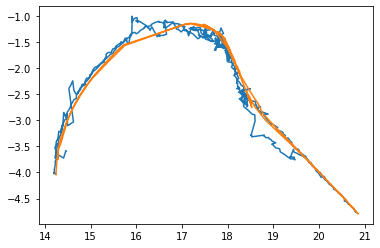

Mean: 0.135, Median: 0.126, Std: 0.069


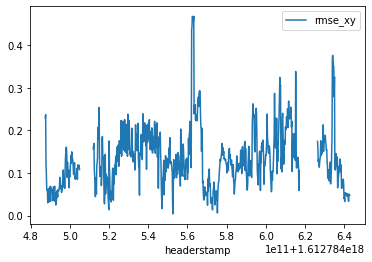

In [4]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# Rumlang 3
## Standard ICP

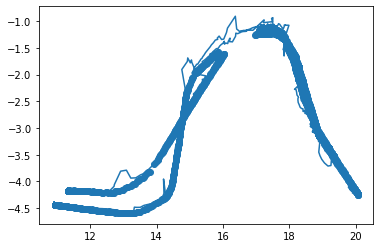

Mean: 0.134, Median: 0.108


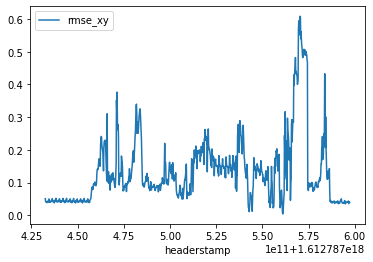

In [23]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Pretraining

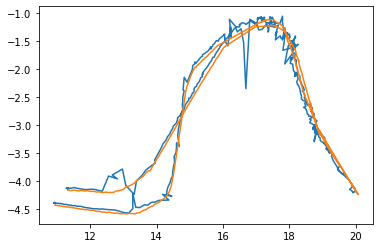

Mean: 0.118, Median: 0.100


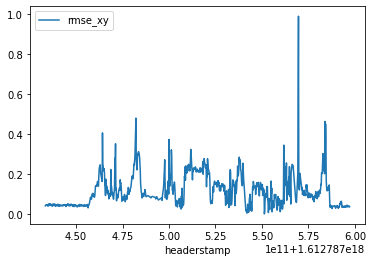

In [6]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [16]:
plt.plot(range(20), leica['trans_x'][306:320])

ValueError: x and y must have same first dimension, but have shapes (20,) and (14,)

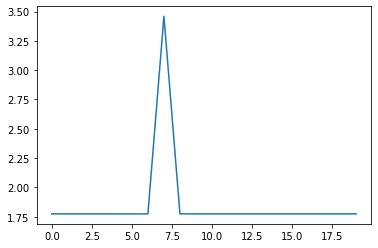

In [21]:
plt.plot(range(20), leica['trans_x'][300:320])

In [18]:
leica.iloc[306:309]

headerstamp  receivestamp   trans_x   trans_y   trans_z  \
306  1612787448867316741  1.612787e+09  1.774105  6.367275  1.000918   
307  1612787449073316831  1.612787e+09  3.460043  4.332359  1.211590   
308  1612787449270316858  1.612787e+09  1.774328  6.367591  1.002182   

     aligned_x  aligned_y  
306  10.941125  -4.435465  
307  12.976041  -2.749527  
308  10.940809  -4.435242

# Office4
## Standard ICP

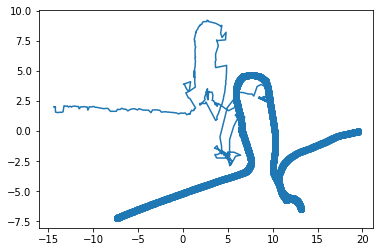

8.514315372837324

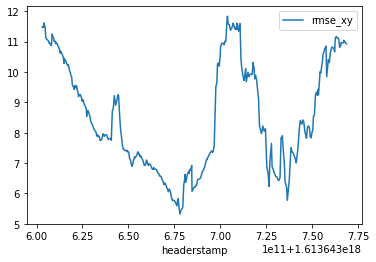

In [15]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

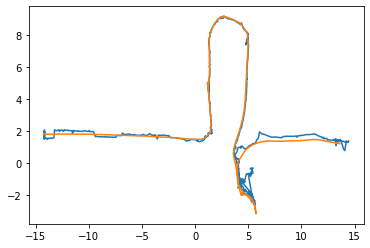

Mean: 0.255, Median: 0.163


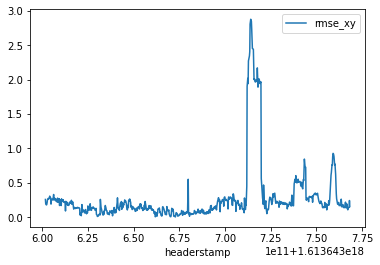

In [64]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_8.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_8.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

(6.0, 10.0)

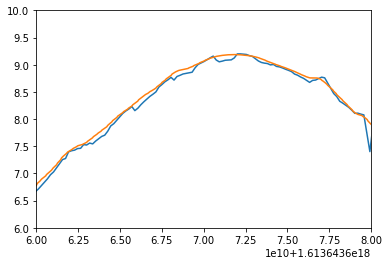

In [63]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4e8, leica['aligned_y'])
plt.xlim(1.613643e18+6.6e11, 1.613643e18+6.8e11)
plt.ylim(6, 10)

## NYU Pretraining

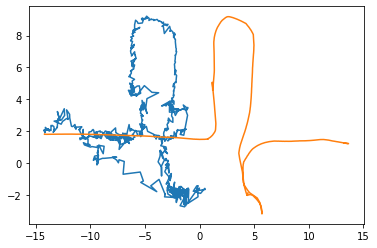

Mean: 7.769, Median: 7.112


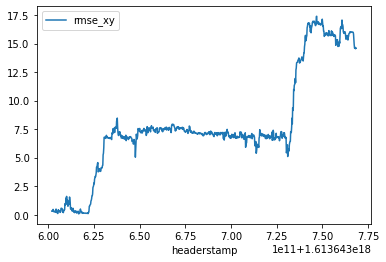

In [11]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_leica_3.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office5
## Standard ICP

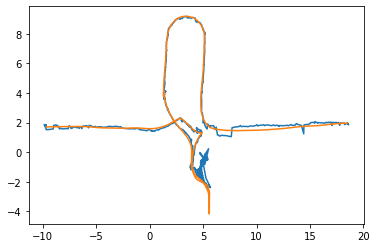

Mean: 0.396, Median: 0.149


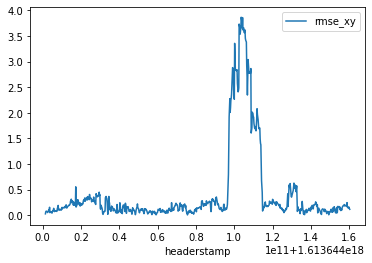

In [65]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_4.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

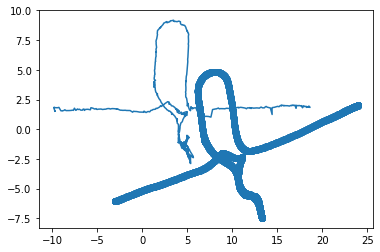

7.482331391154735

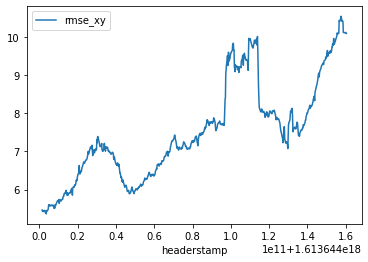

In [30]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Pretraining

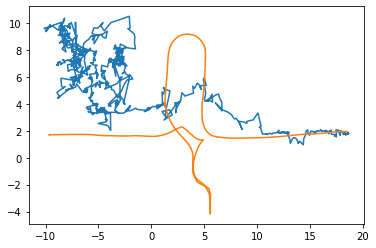

Mean: 8.194, Median: 9.568


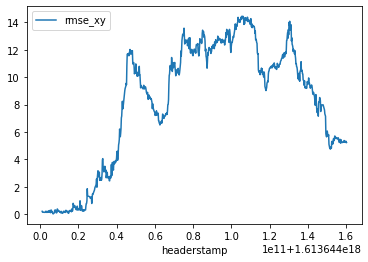

In [12]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office6
## Standard ICP

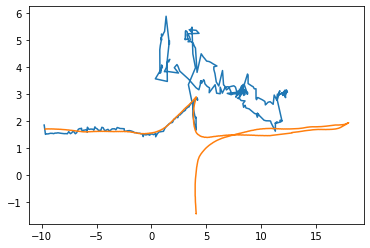

Mean: 3.103, Median: 4.109


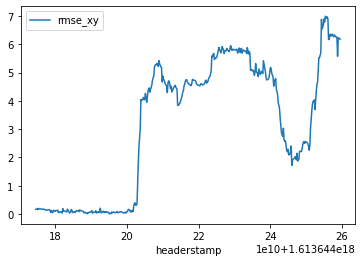

In [66]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_leica_6.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Segmentation

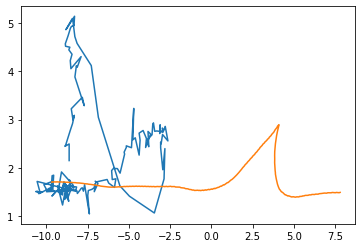

Mean: 6.983, Median: 7.118


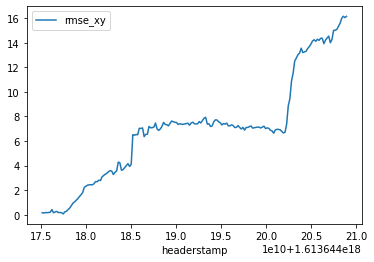

In [13]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Office 7
### Standard ICP

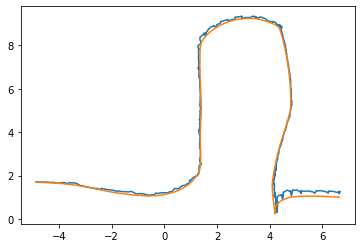

Mean: 0.167, Median: 0.168


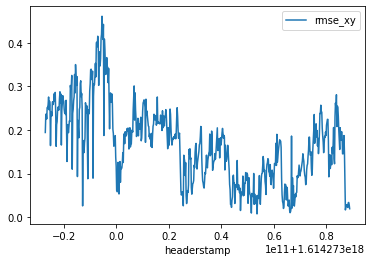

In [4]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

(1.0, 3.0)

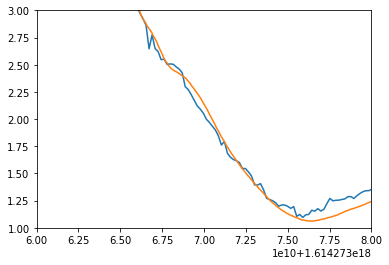

In [8]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4e8, leica['aligned_y'])
plt.xlim(1.614273e18+.6e11, 1.614273e18+.8e11)
plt.ylim(1, 3)

## Segmentation from NYU

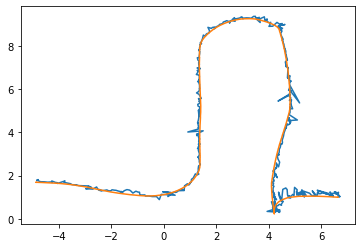

Mean: 0.145, Median: 0.126


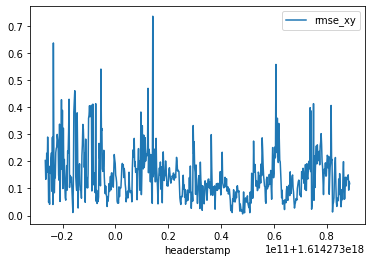

In [10]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_leica_2.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

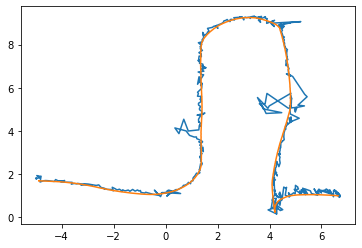

Mean: 0.196, Median: 0.145


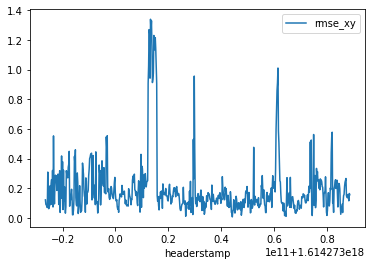

In [7]:
# this is with force4DOF off
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office7_leica_4.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))


### Our Segmentation

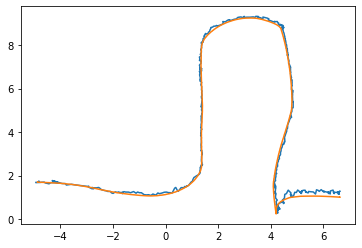

Mean: 0.137, Median: 0.130


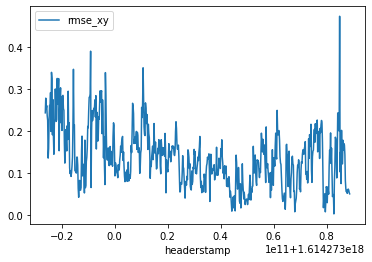

In [31]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

(1.0, 3.0)

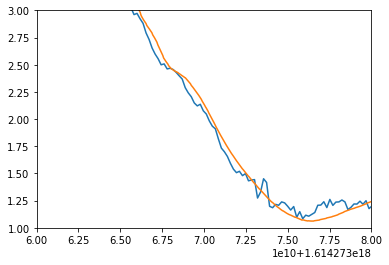

In [32]:
# with force4DOF off

icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))